In [1]:
# !pip install keras -- upgrade
# !pip install tensorflow-gpu==2.6
# !pip install tensorflow[and-cuda]
# os.environ["KERAS_BACKEND"] = "tensorflow"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
tf.config.list_physical_devices('GPU') 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , Activation , BatchNormalization
from tensorflow.keras.optimizers import Adam
# import splitfolders

In [ ]:
# from zipfile import ZipFile

# file_name = "archive.zip"

# with ZipFile(file_name, 'r') as zip:
#     zip.printdir()

#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')


In [12]:
training_data = tf.keras.utils.image_dataset_from_directory('plantvillage dataset/color',
                                                           labels='inferred',
                                                           label_mode='categorical',
                                                           class_names=None,
                                                           color_mode='rgb',
                                                           batch_size=32,
                                                           image_size=(128,128), 
                                                           shuffle=True,
                                                           seed=None,
              
                                                            validation_split=None,
                                                           subset=None,
                                                           interpolation='bilinear',
                                                           follow_links=False,
                                                           crop_to_aspect_ratio=False
                                                           )

Found 54305 files belonging to 38 classes.


In [14]:
validation_data = tf.keras.utils.image_dataset_from_directory('plantvillage dataset/grayscale',
                                                           labels='inferred',
                                                           label_mode='categorical',
                                                           class_names=None,
                                                           color_mode='rgb',
                                                           batch_size=32,
                                                           image_size=(128,128), 
                                                           shuffle=True,
                                                           seed=None,
                                                           validation_split=None,
                                                           subset=None,
                                                           interpolation='bilinear',
                                                           follow_links=False,
                                                           crop_to_aspect_ratio=False
                                                           )

Found 54305 files belonging to 38 classes.


In [15]:
model = tf.keras.models.Sequential([
    
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=([128,128,3])),
    Conv2D(filters=32,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=64,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    
    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=128,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    
    Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=256,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    
    Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=512,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    
    Dropout(0.25),
    Flatten(),
    Dense(units=1500 , activation='relu'),
    
    Dropout(0.4),
    Dense(units=38,activation='softmax')
])



In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_trin = model.fit(training_data, epochs=10, validation_data=validation_data )

Epoch 1/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 2156s 1s/step - accuracy: 0.4575 - loss: 1.9904 - val_accuracy: 0.0501 - val_loss: 4.5778
Epoch 2/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 1915s 1s/step - accuracy: 0.8220 - loss: 0.5689 - val_accuracy: 0.1254 - val_loss: 4.7083
Epoch 3/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 1926s 1s/step - accuracy: 0.8953 - loss: 0.3198 - val_accuracy: 0.1167 - val_loss: 4.0291
Epoch 4/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 2107s 1s/step - accuracy: 0.9278 - loss: 0.2227 - val_accuracy: 0.1730 - val_loss: 3.6815
Epoch 5/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 1972s 1s/step - accuracy: 0.9446 - loss: 0.1692 - val_accuracy: 0.0553 - val_loss: 6.3410
Epoch 6/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 1967s 1s/step - accuracy: 0.9588 - loss: 0.1236 - val_accuracy: 0.0828 - val_loss: 4.8306
Epoch 7/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 2114s 1s/step - accuracy: 0.9679 - loss: 0.0962 - val_accuracy: 0.1811 - val_loss: 3.2887
Epoch 8/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 2486s 1s/step - accuracy: 0.9726 -

In [19]:
train_loss , trian_acc = model.evaluate(training_data)
print('Accuracy: ' , trian_acc)

1698/1698 ━━━━━━━━━━━━━━━━━━━━ 448s 264ms/step - accuracy: 0.9888 - loss: 0.0338
Accuracy:  0.9905533790588379


In [20]:
val_loss , val_acc = model.evaluate(validation_data)
print('Accuracy: ' , val_acc)

1698/1698 ━━━━━━━━━━━━━━━━━━━━ 442s 260ms/step - accuracy: 0.0571 - loss: 6.7815
Accuracy:  0.05800570920109749


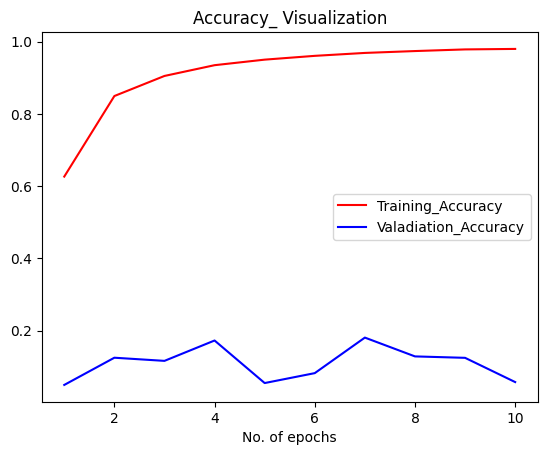

In [21]:
eposhs = [i for i in range(1,11)]
plt.plot(eposhs,model_trin.history['accuracy'],color='red',label='Training_Accuracy')
plt.plot(eposhs,model_trin.history['val_accuracy'],color='blue',label='Valadiation_Accuracy')
plt.xlabel('No. of epochs')
plt.title('Accuracy_ Visualization')
plt.legend()
plt.show()

In [22]:
class_name=validation_data.class_names

In [25]:
test_data = tf.keras.utils.image_dataset_from_directory('plantvillage dataset/segmented',
                                                           labels='inferred',
                                                           label_mode='categorical',
                                                           class_names=None,
                                                           color_mode='rgb',
                                                           batch_size=32,
                                                           image_size=(128,128), 
                                                           shuffle=True,
                                                           seed=None,
                                                           validation_split=None,
                                                           subset=None,
                                                           interpolation='bilinear',
                                                           follow_links=False,
                                                           crop_to_aspect_ratio=False
                                                           )

Found 54306 files belonging to 38 classes.


In [26]:
y_pred = model.predict(test_data)
predicted_cat=tf.argmax(y_pred,axis=1)

1698/1698 ━━━━━━━━━━━━━━━━━━━━ 500s 293ms/step


In [27]:
true_cat=tf.concat([y for x,y in test_data],axis=0)
y_true=tf.argmax(true_cat,axis=1)
y_true

<tf.Tensor: shape=(54306,), dtype=int64, numpy=array([33, 18, 32, ..., 16, 24, 25], dtype=int64)>

In [28]:
predicted_cat

<tf.Tensor: shape=(54306,), dtype=int64, numpy=array([19,  8, 30, ..., 30,  8,  8], dtype=int64)>

In [29]:
from sklearn.metrics import confusion_matrix ,classification_report
cm = confusion_matrix(y_true,predicted_cat)

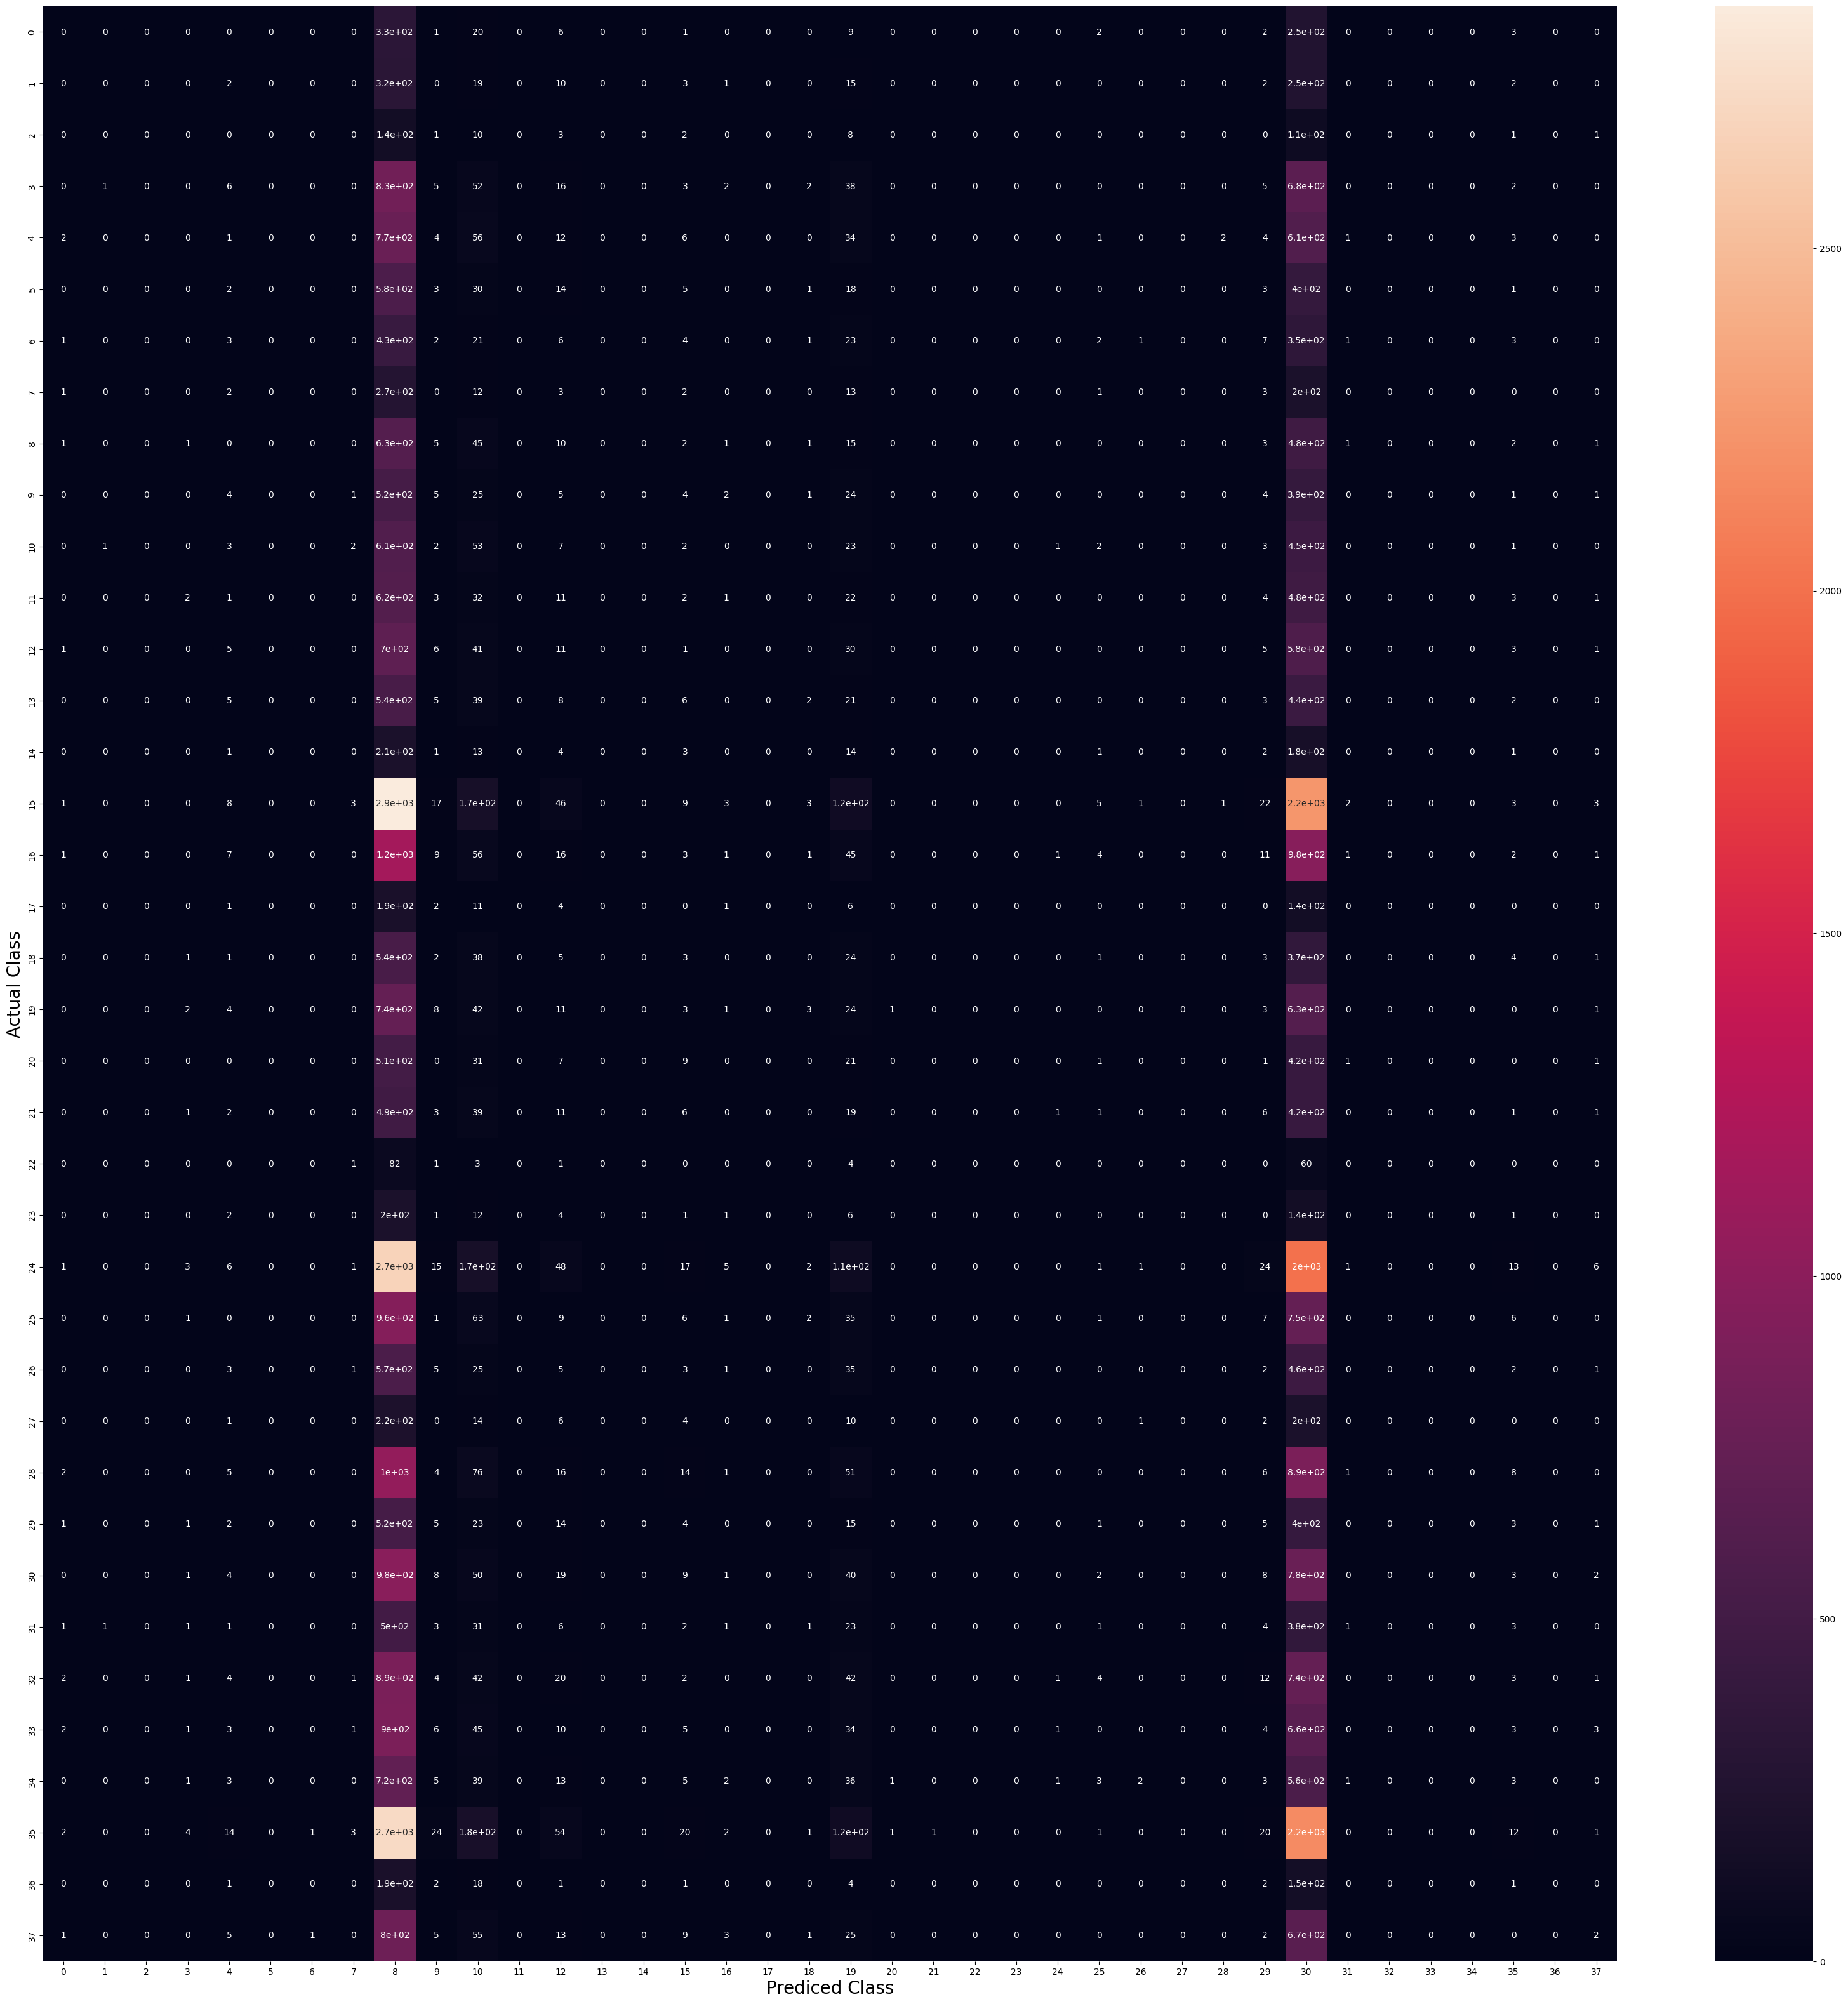

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True,annot_kws={'size':10})
plt.xlabel('Prediced Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.show() 


In [31]:
print(classification_report(y_true,predicted_cat, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       630
                                 Apple___Black_rot       0.00      0.00      0.00       621
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       275
                                   Apple___healthy       0.00      0.00      0.00      1645
                               Blueberry___healthy       0.01      0.00      0.00      1502
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00      1052
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       513
                       Corn_(maize)___Common_rust_       0.02      0.53      0.04      1192
               Corn_(maize)___Northern_Leaf_Blight       0.03      0.01      0.

f:\APP\Programming tools\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\APP\Programming tools\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\APP\Programming tools\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
model.save('trained_plant_disease_model.keras')